In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("wait_times_2015_2024.csv")
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
print(df.head)

<bound method NDFrame.head of              Date                                    Ride  \
0      2015-01-01                          Space Mountain   
1      2015-01-01                Indiana Jones™ Adventure   
2      2015-01-01                      Peter Pan's Flight   
3      2015-01-01                     Alice in Wonderland   
4      2015-01-01            Roger Rabbit's Car Toon Spin   
...           ...                                     ...   
174677 2024-12-31              Storybook Land Canal Boats   
174678 2024-12-31  The Many Adventures of Winnie the Pooh   
174679 2024-12-31                 Tiana's Bayou Adventure   
174680 2024-12-31    Tiana's Bayou Adventure Single Rider   
174681 2024-12-31       Walt Disney's Enchanted Tiki Room   

        Average Wait Time (mins)  Max Wait Time (mins)  
0                           50.0                  96.0  
1                           48.0                  91.0  
2                           42.0                  50.0  
3        

In [46]:
# List of rides to keep
rides_with_starwars = [
    "Peter Pan's Flight",
    "Alice in Wonderland",
    "Buzz Lightyear Astro Blasters",
    "Disneyland Monorail",
    "Dumbo the Flying Elephant",
    "King Arthur Carrousel",
    "Pinocchio's Daring Journey",
    "Snow White's Enchanted Wish",
    "Space Mountain",
    "Astro Orbitor",
    "Mad Tea Party",
    "Star Tours - The Adventures Continue",
    "Mr. Toad's Wild Ride",
    "\"it's a small world\" Holiday",
    "Autopia",
    "Big Thunder Mountain Railroad",
    "Casey Jr. Circus Train",
    "Chip 'n' Dale's GADGETcoaster",
    "Davy Crockett's Explorer Canoes",
    "Disneyland Railroad",
    "Finding Nemo Submarine Voyage",
    "Indiana Jones™ Adventure",
    "Jungle Cruise",
    "Mark Twain Riverboat",
    "Matterhorn Bobsleds",
    "Mickey & Minnie's Runaway Railway",
    "Millennium Falcon: Smugglers Run",
    "Pirates of the Caribbean",
    "Roger Rabbit's Car Toon Spin",
    "Sailing Ship Columbia",
    "Star Wars: Rise of the Resistance",
    "Storybook Land Canal Boats",
    "The Many Adventures of Winnie the Pooh",
    "Tiana's Bayou Adventure"
]
with_starwars = df[df["Ride"].isin(rides_with_starwars)]

print("Original rows:", len(df))
print("Filtered rows:", len(with_starwars))

# Number of rows that are actually rides
display(with_starwars.head())
with_starwars.shape[0]

Original rows: 174682
Filtered rows: 96958


,Date,Ride,Average Wait Time (mins),Max Wait Time (mins)
0,2015-01-01,Space Mountain,50.0,96.0
1,2015-01-01,Indiana Jones™ Adventure,48.0,91.0
2,2015-01-01,Peter Pan's Flight,42.0,50.0
3,2015-01-01,Alice in Wonderland,37.0,50.0
4,2015-01-01,Roger Rabbit's Car Toon Spin,34.0,61.0


96958

In [48]:
rides_without_starwars = [
    "Peter Pan's Flight",
    "Alice in Wonderland",
    "Buzz Lightyear Astro Blasters",
    "Disneyland Monorail",
    "Dumbo the Flying Elephant",
    "King Arthur Carrousel",
    "Pinocchio's Daring Journey",
    "Snow White's Enchanted Wish",
    "Space Mountain",
    "Astro Orbitor",
    "Mad Tea Party",
    "Star Tours - The Adventures Continue",
    "Mr. Toad's Wild Ride",
     "\"it's a small world\" Holiday",
    "Autopia",
    "Big Thunder Mountain Railroad",
    "Casey Jr. Circus Train",
    "Davy Crockett's Explorer Canoes",
    "Disneyland Railroad",
    "Finding Nemo Submarine Voyage",
    "Indiana Jones™ Adventure",
    "Jungle Cruise",
    "Mark Twain Riverboat",
    "Matterhorn Bobsleds",
    "Pirates of the Caribbean",
    "Roger Rabbit's Car Toon Spin",
    "Sailing Ship Columbia",
    "Storybook Land Canal Boats",
    "The Many Adventures of Winnie the Pooh"
]

without_starwars = df[df["Ride"].isin(rides_without_starwars)]

print("Original rows:", len(df))
print("Filtered rows:", len(without_starwars))

# Number of rows that are actually rides
display(without_starwars.head())
without_starwars.shape[0]


Original rows: 174682
Filtered rows: 89923


,Date,Ride,Average Wait Time (mins),Max Wait Time (mins)
0,2015-01-01,Space Mountain,50.0,96.0
1,2015-01-01,Indiana Jones™ Adventure,48.0,91.0
2,2015-01-01,Peter Pan's Flight,42.0,50.0
3,2015-01-01,Alice in Wonderland,37.0,50.0
4,2015-01-01,Roger Rabbit's Car Toon Spin,34.0,61.0


89923

In [ ]:
# Missing values WITH STARWARS
missing_counts = with_starwars.isna().sum()
missing_pct = with_starwars.isna().mean() * 100

missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct.round(2)
})

print("\nMissing values summary:")
display(missing_summary)


Missing values summary:


,missing_count,missing_pct
Date,0,0.00
Ride,0,0.00
Average Wait Time (mins),23680,24.42
Max Wait Time (mins),23938,24.69


In [49]:
# Missing values WITHOUT STARWARS
missing_counts = without_starwars.isna().sum()
missing_pct = without_starwars.isna().mean() * 100

missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct.round(2)
})

print("\nMissing values summary:")
display(missing_summary)


Missing values summary:


,missing_count,missing_pct
Date,0,0.00
Ride,0,0.00
Average Wait Time (mins),20598,22.91
Max Wait Time (mins),20829,23.16


In [ ]:
# Basic stats & ranges WITH STARWARS
n_rides = with_starwars["Ride"].nunique()
print(f"\nNumber of unique rides: {n_rides}")

# Date range
min_date = with_starwars["Date"].min()
max_date = with_starwars["Date"].max()
print(f"Date range: {min_date.date()} to {max_date.date()}")

# Numeric summary for wait times
wait_cols = ["Average Wait Time (mins)", "Max Wait Time (mins)"]

print("\nDescriptive stats for wait time columns:")
display(with_starwars[wait_cols].describe())


Number of unique rides: 34
Date range: 2015-01-01 to 2024-12-31

Descriptive stats for wait time columns:


,Average Wait Time (mins),Max Wait Time (mins)
count,73278.000000,73020.000000
mean,20.655954,35.347056
std,14.659412,26.267619
min,0.000000,5.000000
25%,10.000000,15.000000
50%,17.000000,30.000000
75%,28.000000,45.000000
max,169.000000,900.000000


In [ ]:
# Basic stats & ranges WITHOUT STARWARS
n_rides = without_starwars["Ride"].nunique()
print(f"\nNumber of unique rides: {n_rides}")

# Date range
min_date = without_starwars["Date"].min()
max_date = without_starwars["Date"].max()
print(f"Date range: {min_date.date()} to {max_date.date()}")

# Numeric summary for wait times
wait_cols = ["Average Wait Time (mins)", "Max Wait Time (mins)"]

print("\nDescriptive stats for wait time columns:")
display(without_starwars[wait_cols].describe())

In [50]:
# Check for outliers WITH STARWARS
for col in wait_cols:
    print(f"\nOutlier check for {col}:")
    print(f"  Min:   {with_starwars[col].min()}")
    print(f"  99th percentile: {df[col].quantile(0.99)}")
    print(f"  Max:   {with_starwars[col].max()}")



Outlier check for Average Wait Time (mins):
  Min:   0.0
  99th percentile: 69.0
  Max:   169.0

Outlier check for Max Wait Time (mins):
  Min:   5.0
  99th percentile: 120.0
  Max:   900.0


In [51]:
# Check for outliers WITHOUT STARWARS
for col in wait_cols:
    print(f"\nOutlier check for {col}:")
    print(f"  Min:   {without_starwars[col].min()}")
    print(f"  99th percentile: {df[col].quantile(0.99)}")
    print(f"  Max:   {without_starwars[col].max()}")



Outlier check for Average Wait Time (mins):
  Min:   0.0
  99th percentile: 69.0
  Max:   147.0

Outlier check for Max Wait Time (mins):
  Min:   5.0
  99th percentile: 120.0
  Max:   900.0


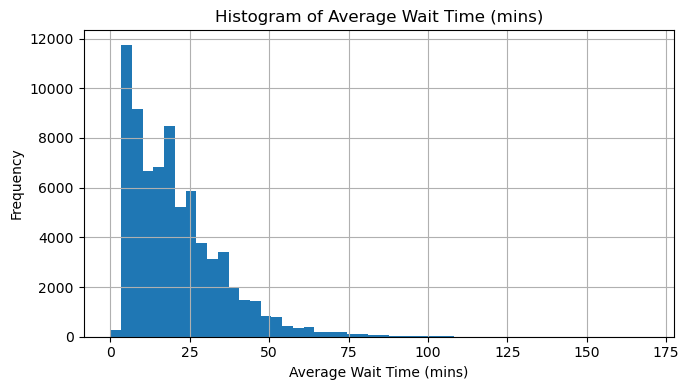

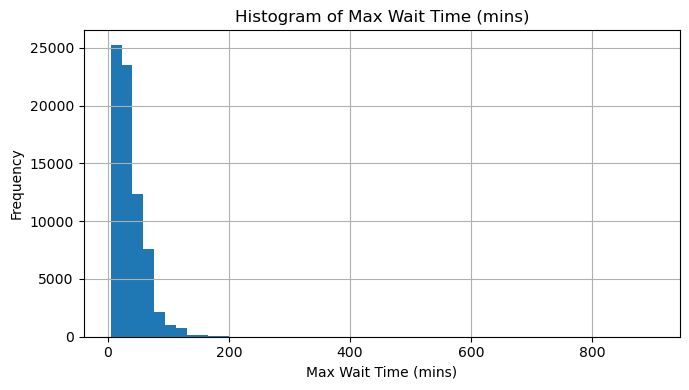

In [ ]:
# Histograms of wait times (ignoring nulls) WITH STARWARS
for col in wait_cols:
    plt.figure(figsize=(7, 4))
    with_starwars[col].dropna().hist(bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


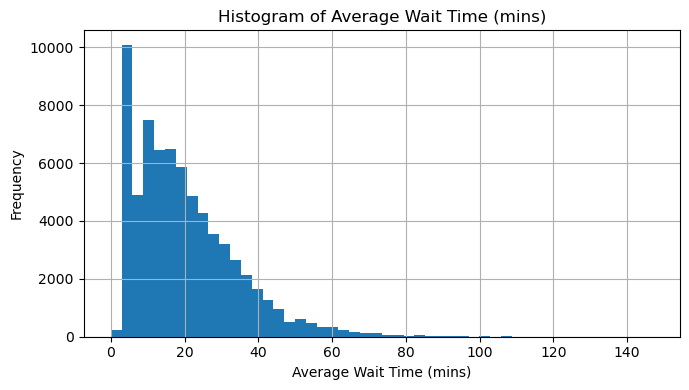

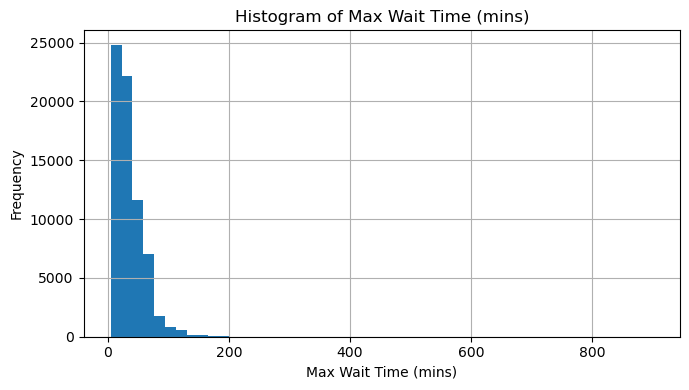

In [53]:
# Histograms of wait times (ignoring nulls) WITHOUT STARWARS
for col in wait_cols:
    plt.figure(figsize=(7, 4))
    without_starwars[col].dropna().hist(bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [54]:
daily = without_starwars.groupby(["Ride", "Date"])["Average Wait Time (mins)"].median().reset_index()
daily = daily.sort_values(["Ride", "Date"])

def mature_iqr(g):
    last_date = g["Date"].max()
    start = last_date - pd.Timedelta(days=365)
    g = g[g["Date"] >= start]
    if len(g) < 60:
        return np.nan
    q1 = g["Average Wait Time (mins)"].quantile(0.25)
    q3 = g["Average Wait Time (mins)"].quantile(0.75)
    return q3 - q1

iqr_per_ride = daily.groupby("Ride").apply(mature_iqr).reset_index(name="iqr")
iqr_per_ride = iqr_per_ride.dropna()

tau_median = iqr_per_ride["iqr"].median()
tau_75 = iqr_per_ride["iqr"].quantile(0.75)

print("Median mature IQR:", tau_median)
print("75th percentile mature IQR:", tau_75)


Median mature IQR: 9.0
75th percentile mature IQR: 13.0


/var/folders/sk/q8ph95qn0xs54l6gkxt64n7h0000gn/T/ipykernel_57924/220981472.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  iqr_per_ride = daily.groupby("Ride").apply(mature_iqr).reset_index(name="iqr")


In [55]:
# Mature median IQR you computed earlier
tau_median = 9.0   # or use the variable you already have

# Rides of interest (use straight quotes to match the CSV)
rides_of_interest = [
    "Mickey & Minnie's Runaway Railway",
    "Chip 'n' Dale's GADGETcoaster",
    "Tiana's Bayou Adventure",
    "Star Wars: Rise of the Resistance",
    "Millennium Falcon: Smugglers Run"
]

# Filter to just these rides
rides_df = df[df["Ride"].isin(rides_of_interest)].copy()

# Create a Year-Month column
rides_df["YearMonth"] = rides_df["Date"].dt.to_period("M")

# Compute MONTHLY IQR of Average Wait Time per ride
monthly_iqr = (
    rides_df
    .groupby(["Ride", "YearMonth"])["Average Wait Time (mins)"]
    .agg(lambda x: x.quantile(0.75) - x.quantile(0.25))
    .reset_index(name="iqr")
)

print("Monthly IQR for each ride (head):")
display(monthly_iqr.head())

# Find the FIRST month where monthly IQR <= mature median IQR (tau_median)
first_mature_month = (
    monthly_iqr[monthly_iqr["iqr"] <= tau_median]
    .sort_values(["Ride", "YearMonth"])
    .groupby("Ride")
    .first()      # first row per Ride after sorting by YearMonth
    .reset_index()
)

print("First month where monthly IQR <= mature median IQR (9.0):")
display(first_mature_month)

Monthly IQR for each ride (head):


,Ride,YearMonth,iqr
0,Chip 'n' Dale's GADGETcoaster,2015-01,8.25
1,Chip 'n' Dale's GADGETcoaster,2015-02,11.00
2,Chip 'n' Dale's GADGETcoaster,2015-03,6.00
3,Chip 'n' Dale's GADGETcoaster,2015-04,11.25
4,Chip 'n' Dale's GADGETcoaster,2015-05,7.50


First month where monthly IQR <= mature median IQR (9.0):


,Ride,YearMonth,iqr
0,Chip 'n' Dale's GADGETcoaster,2015-01,8.25
1,Mickey & Minnie's Runaway Railway,2023-03,0.00
2,Millennium Falcon: Smugglers Run,2019-08,7.50
3,Star Wars: Rise of the Resistance,2022-03,7.00


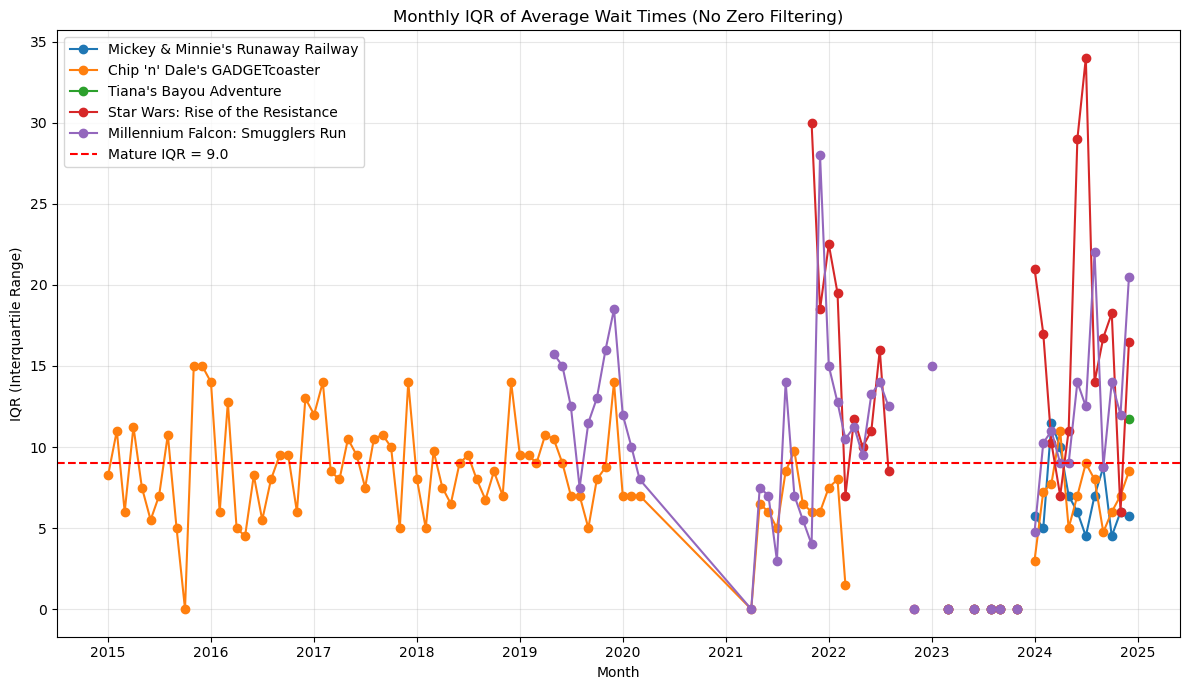

In [56]:
rides_of_interest = [
    "Mickey & Minnie's Runaway Railway",
    "Chip 'n' Dale's GADGETcoaster",
    "Tiana's Bayou Adventure",
    "Star Wars: Rise of the Resistance",
    "Millennium Falcon: Smugglers Run"
]

# Filter to these rides
rides_df = df[df["Ride"].isin(rides_of_interest)].copy()

# Create a YearMonth column
rides_df["YearMonth"] = rides_df["Date"].dt.to_period("M")

# Compute monthly IQR for each ride
monthly_iqr = (
    rides_df.groupby(["Ride", "YearMonth"])["Average Wait Time (mins)"]
            .agg(lambda x: x.quantile(0.75) - x.quantile(0.25))
            .reset_index(name="iqr")
)

# Convert YearMonth back to a timestamp for plotting
monthly_iqr["YearMonth"] = monthly_iqr["YearMonth"].dt.to_timestamp()

# -------------------------------------------
# 📈 PLOT monthly IQR for each ride
# -------------------------------------------

plt.figure(figsize=(12, 7))

for ride in rides_of_interest:
    ride_data = monthly_iqr[monthly_iqr["Ride"] == ride]
    plt.plot(ride_data["YearMonth"], ride_data["iqr"], marker="o", label=ride)

# Plot the mature IQR threshold line
plt.axhline(tau_median, color="red", linestyle="--", label=f"Mature IQR = {tau_median}")

plt.title("Monthly IQR of Average Wait Times (No Zero Filtering)")
plt.xlabel("Month")
plt.ylabel("IQR (Interquartile Range)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
